# Task 1


### Action I

In [41]:
import yfinance as yf

ticker = yf.Ticker("AAPL")
df = ticker.history(period="5y")
print(df.head())

                                 Open        High         Low       Close  \
Date                                                                        
2020-09-08 00:00:00-04:00  110.841203  115.743703  109.605855  109.742035   
2020-09-09 00:00:00-04:00  114.060902  115.889609  112.115466  114.119263   
2020-09-10 00:00:00-04:00  117.076320  117.212500  109.430757  110.393745   
2020-09-11 00:00:00-04:00  111.444266  112.086263  106.998946  108.944382   
2020-09-14 00:00:00-04:00  111.590184  112.767172  109.722568  112.212723   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-09-08 00:00:00-04:00  231366600        0.0           0.0  
2020-09-09 00:00:00-04:00  176940500        0.0           0.0  
2020-09-10 00:00:00-04:00  182274400        0.0           0.0  
2020-09-11 00:00:00-04:00  180860300        0.0           0.0  
2020-09-14 00:00:00-04:00  140150100        0.0           0.0  


#### Column Explanations

Date (index) – Trading day.\
Open – Price when the stock first traded that day.\
High – Highest price during that day.\
Low – Lowest price during that day.\
Close – Price at the end of the trading day (this is our target y).\
Volume – Number of shares traded that day.\
Dividends – Dividend issued per share on that day (if any).\
Stock Splits – Stock split ratio (if a split occurred that day).

#### Choosing Features (X) to Predict Close 
Since the goal is to predict Close, we need predictors that make sense: \
Good candidates for Features (X): \
Open → starting price of the day (strongly related to Close). \
High → daily max, often correlated with closing price. \
Low → daily min, also correlated. \
Volume → market activity, might influence price movement. \
Not ideal for prediction in this assignment: \
Dividends (rare events, mostly 0). \
Stock Splits (rare events, mostly 0). 

In [42]:
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

### Action II

In [43]:
import yfinance as yf
import pandas as pd

# Get stock data
ticker = yf.Ticker("AAPL")  # you can pick another stock, e.g. "MSFT"
df = ticker.history(period="5y")

# Define Features (X) and Target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Write features to console
print("Features (X) sample:")
print(X.head())
print("\nTarget (y) sample:")
print(y.head())


Features (X) sample:
                                 Open        High         Low     Volume
Date                                                                    
2020-09-08 00:00:00-04:00  110.841203  115.743703  109.605855  231366600
2020-09-09 00:00:00-04:00  114.060902  115.889609  112.115466  176940500
2020-09-10 00:00:00-04:00  117.076320  117.212500  109.430757  182274400
2020-09-11 00:00:00-04:00  111.444266  112.086263  106.998946  180860300
2020-09-14 00:00:00-04:00  111.590184  112.767172  109.722568  140150100

Target (y) sample:
Date
2020-09-08 00:00:00-04:00    109.742035
2020-09-09 00:00:00-04:00    114.119263
2020-09-10 00:00:00-04:00    110.393745
2020-09-11 00:00:00-04:00    108.944382
2020-09-14 00:00:00-04:00    112.212723
Name: Close, dtype: float64


#### Action III

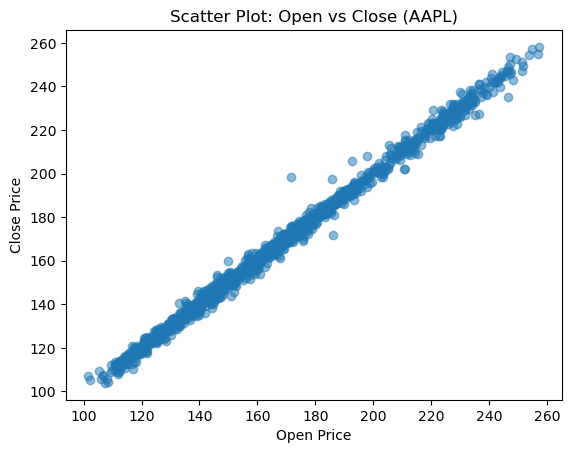

In [44]:
import matplotlib.pyplot as plt

# Plot open and close values
plt.scatter(df["Open"], df["Close"], alpha=0.5)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Scatter Plot: Open vs Close (AAPL)")
plt.show()

#### Action IV

In [45]:
# Combine X and y into one DataFrame for correlation
corr = df[["Open", "High", "Low", "Volume", "Close"]].corr()

print("Correlation matrix:")
print(corr["Close"])

Correlation matrix:
Open      0.997554
High      0.998914
Low       0.998863
Volume   -0.531182
Close     1.000000
Name: Close, dtype: float64


Open → Close: Very strong positive correlation (~0.99). \
High → Close: Very strong positive correlation (~0.99). \
Low → Close: Very strong positive correlation (~0.99). \
Volume → Close: Negative correlation (-0.531181).

This suggests that higher trading activity sometimes coincides with price dropping.

#### Action V

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Split dataset: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Print to console
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (878, 4)
Testing features shape: (377, 4)
Training target shape: (878,)
Testing target shape: (377,)


#### Action VI

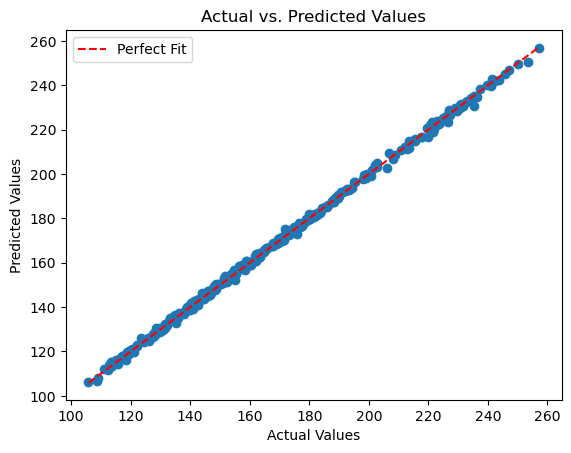

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Chatgbt fix not idea what this does
y_pred = model.predict(X_test)

# Model Creation
model = LinearRegression()

# fit model to training data
model.fit(X_train, y_train)

# Chatgbt fix not sure how this works will come back
# TODO
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.show()


#### Action VII

In [49]:
# Print model intercept etc to console
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.7207442084678348
Coefficients: [-5.96976616e-01  8.00487376e-01  7.94171848e-01 -3.65800366e-09]
